In [1]:
%matplotlib inline

In [2]:
import os, sys, pickle
import os.path as osp
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from matplotlib.gridspec import GridSpec

In [3]:
def performance(diffs, Ns, ax = None):  
    if not ax:
        fig, ax1   = plt.subplots(figsize = (9, 6))
    else:
        ax1 = ax
    
    ax2        = ax1.twinx()
    
    
    splits = 15

    count, bins, _ = ax1.hist(np.log10(Ns), bins = splits, log = "true", color = "gray", zorder = 10, density = True)
    ax1.set_xlabel("$log_{10}N$")
    
    med_arr    = []
    perc_arr   = []

    for i in range(len(bins) - 1):
        current_diffs = diffs[(bins[i] < np.log10(Ns)) & ( np.log10(Ns) <= bins[i + 1])]
        median        = np.percentile(abs(current_diffs), 50)
        percentiles   = np.percentile(abs(current_diffs), [50 - 34, 50 + 34])

        med_arr.append(median)
        perc_arr.append(percentiles)

    xs = (bins[1:] + bins[:-1]) / 2

    ax2.plot(xs, med_arr, "ro", zorder = -1)
    ax2.errorbar(xs, med_arr, np.array(perc_arr).T, linestyle = "None", color = "red", capsize = 2)
    
    return ax1, ax2
    

def reco_true_hist(reco, true, ax = None):
    if not ax:
        fig, ax = plt.subplots(figsize = (7, 7))
    
    h, x_edge, y_edge, _ = ax.hist2d(true, reco, bins = 50)
    
    ax.set_xlabel("True")
#     ax.set_ylabel("Reconstructed")
    
    return ax


def azi_zen_from_units(arr):
    azi = np.arctan2(arr[:, 1], arr[:, 0])
    zen = np.pi - np.arccos(arr[:, 2])
    return azi, zen

In [4]:
test_path = osp.join(os.getcwd(), "..", "test_folder")

# Cos-Sin pair for prediction

predict: cos and sin
loss:    mean squared error of wrong prediction on these two

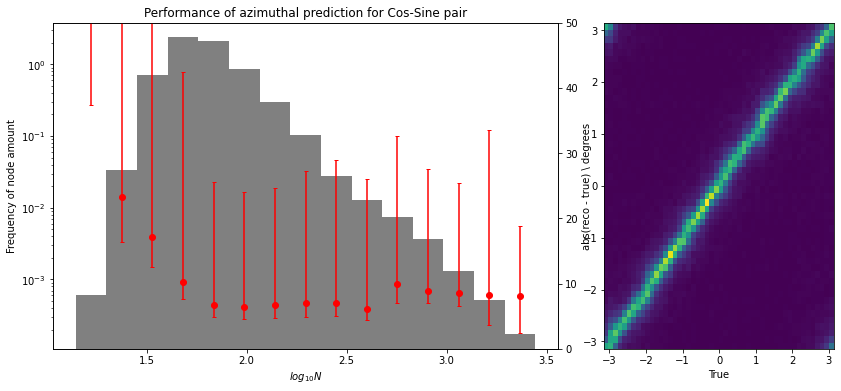

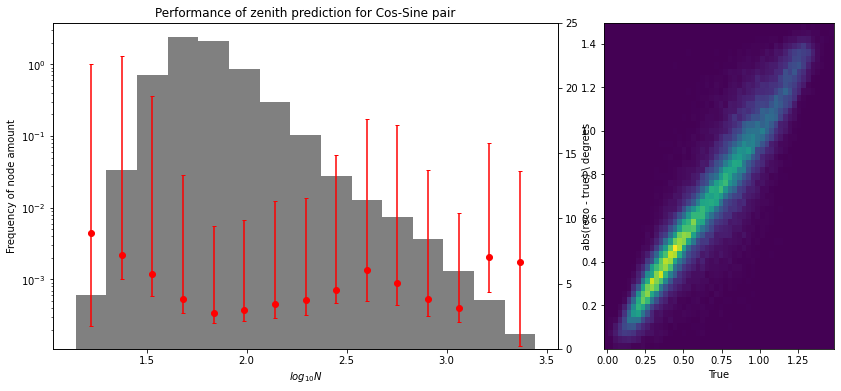

In [5]:
fig1 = plt.figure(figsize = (14, 6))
fig2 = plt.figure(figsize = (14, 6))

gs1  = GridSpec(1, 3, figure = fig1)
gs2  = GridSpec(1, 3, figure = fig2)

ax_azi   = fig1.add_subplot(gs1[:2])
ax_zen   = fig2.add_subplot(gs2[:2])

test_dir = pd.read_pickle(osp.join(test_path, "CosSine.dat"))


reco   = test_dir['reco']
truth  = test_dir['targets']
Ns     = test_dir['Ns']



azi_reco  = np.arctan2(reco[:, 1], reco[:, 0])
zen_reco  = np.arctan2(reco[:, 3], reco[:, 2])


azi_truth = truth[:, 0]
zen_truth = truth[:, 1]
diffs     = 180 / np.pi * np.minimum(abs(azi_truth - azi_reco), 2 * np.pi - abs(azi_truth - azi_reco))

azi_correct = azi_truth - 2 * np.pi * (azi_truth > np.pi)

ax1, ax2 = performance(diffs, Ns, ax_azi);
ax2.set_ylim(0, 50)

ax1.set_title("Performance of azimuthal prediction for Cos-Sine pair");
ax1.set_ylabel("Frequency of node amount")
ax2.set_ylabel("abs(reco - true) \ degrees")

ax_azi        = fig1.add_subplot(gs1[2])

ax       = reco_true_hist(azi_correct, azi_reco ,ax_azi)


diffs     = 180 / np.pi * np.minimum(abs(zen_truth - zen_reco), 2 * np.pi - abs(zen_truth - zen_reco))

ax1, ax2 = performance(diffs, Ns, ax_zen)
ax1.set_title("Performance of zenith prediction for Cos-Sine pair");
ax1.set_ylabel("Frequency of node amount")
ax2.set_ylabel("abs(reco - true) \ degrees")
ax2.set_ylim(0, 25)

ax_zen        = fig2.add_subplot(gs2[2])
ax            = reco_true_hist(zen_truth, zen_reco, ax_zen)


# Negative cos prediction
predict: unit_vects
loss:    1 - cos(angle)

cos(angle) from vects as dot product

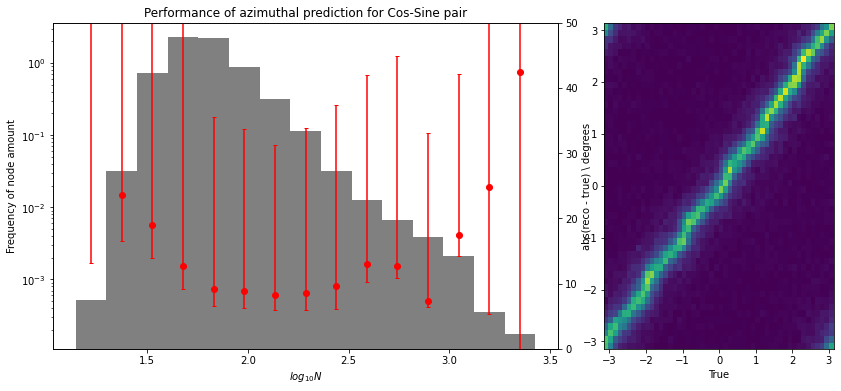

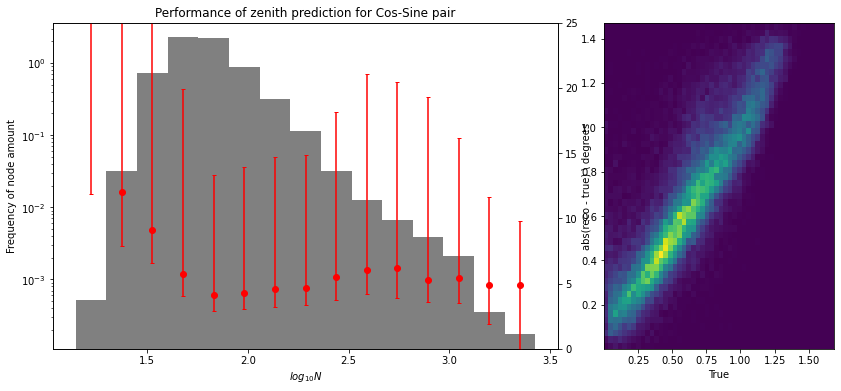

In [6]:
fig1 = plt.figure(figsize = (14, 6))
fig2 = plt.figure(figsize = (14, 6))

gs1  = GridSpec(1, 3, figure = fig1)
gs2  = GridSpec(1, 3, figure = fig2)

ax_azi   = fig1.add_subplot(gs1[:2])
ax_zen   = fig2.add_subplot(gs2[:2])

test_dir = pd.read_pickle(osp.join(test_path, "NegativeCos.dat"))


reco   = test_dir['reco']
truth  = test_dir['targets']
Ns     = test_dir['Ns']


azi_reco,  zen_reco  = azi_zen_from_units(reco)

azi_truth, zen_truth = azi_zen_from_units(truth)


diffs     = 180 / np.pi * np.minimum(abs(azi_truth - azi_reco), 2 * np.pi - abs(azi_truth - azi_reco))
# print(diffs)
azi_correct = azi_truth - 2 * np.pi * (azi_truth > np.pi)

ax1, ax2 = performance(diffs, Ns, ax_azi);
ax2.set_ylim(0, 50)
ax1.set_title("Performance of azimuthal prediction for Cos-Sine pair");
ax1.set_ylabel("Frequency of node amount")
ax2.set_ylabel("abs(reco - true) \ degrees")

ax_azi        = fig1.add_subplot(gs1[2])

ax       = reco_true_hist(azi_correct, azi_reco ,ax_azi)


diffs     = 180 / np.pi * np.minimum(abs(zen_truth - zen_reco), 2 * np.pi - abs(zen_truth - zen_reco))

ax1, ax2 = performance(diffs, Ns, ax_zen)
ax1.set_title("Performance of zenith prediction for Cos-Sine pair");
ax1.set_ylabel("Frequency of node amount")
ax2.set_ylabel("abs(reco - true) \ degrees")
ax2.set_ylim(0, 25)

ax_zen        = fig2.add_subplot(gs2[2])
ax            = reco_true_hist(zen_truth, zen_reco, ax_zen)


# 3D von mises 
predicts unit vectors and a kappa, which is like $1 / \sigma^2$
loss func 3d von mises 

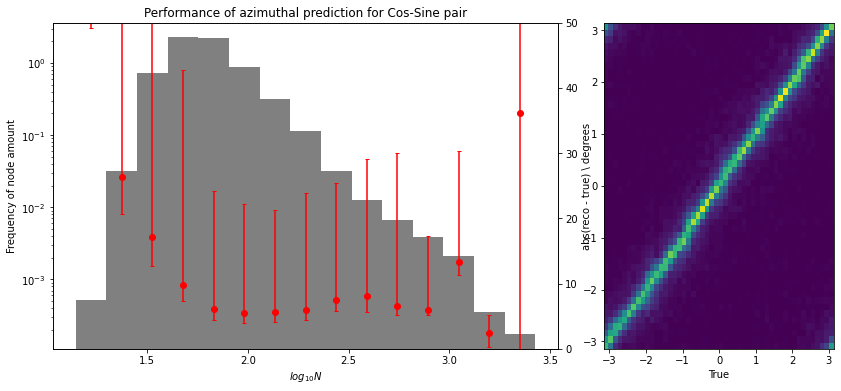

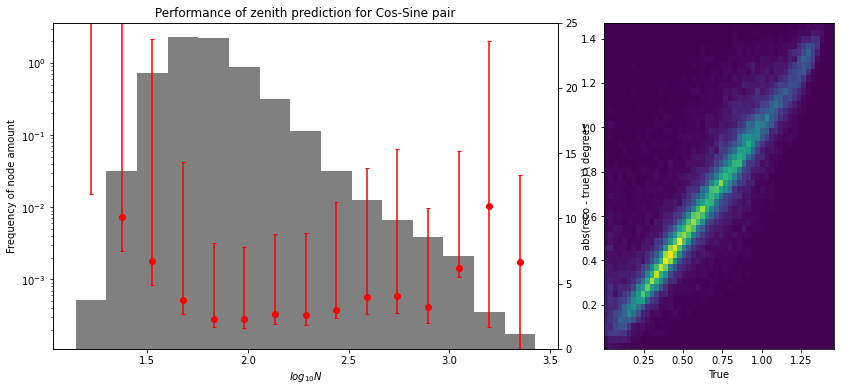

In [7]:
fig1 = plt.figure(figsize = (14, 6))
fig2 = plt.figure(figsize = (14, 6))

gs1  = GridSpec(1, 3, figure = fig1)
gs2  = GridSpec(1, 3, figure = fig2)

ax_azi   = fig1.add_subplot(gs1[:2])
ax_zen   = fig2.add_subplot(gs2[:2])

test_dir = pd.read_pickle(osp.join(test_path, "3DMisesFromUnits.dat"))


reco   = test_dir['reco']
truth  = test_dir['targets']
Ns     = test_dir['Ns']


azi_reco,  zen_reco  = azi_zen_from_units(reco[:, :3])

azi_truth, zen_truth = azi_zen_from_units(truth)


diffs     = 180 / np.pi * np.minimum(abs(azi_truth - azi_reco), 2 * np.pi - abs(azi_truth - azi_reco))
# print(diffs)
azi_correct = azi_truth - 2 * np.pi * (azi_truth > np.pi)

ax1, ax2 = performance(diffs, Ns, ax_azi);
ax2.set_ylim(0, 50)
ax1.set_title("Performance of azimuthal prediction for Cos-Sine pair");
ax1.set_ylabel("Frequency of node amount")
ax2.set_ylabel("abs(reco - true) \ degrees")

ax_azi        = fig1.add_subplot(gs1[2])

ax       = reco_true_hist(azi_correct, azi_reco ,ax_azi)


diffs     = 180 / np.pi * np.minimum(abs(zen_truth - zen_reco), 2 * np.pi - abs(zen_truth - zen_reco))

ax1, ax2 = performance(diffs, Ns, ax_zen)
ax1.set_title("Performance of zenith prediction for Cos-Sine pair");
ax1.set_ylabel("Frequency of node amount")
ax2.set_ylabel("abs(reco - true) \ degrees")
ax2.set_ylim(0, 25)

ax_zen        = fig2.add_subplot(gs2[2])
ax            = reco_true_hist(zen_truth, zen_reco, ax_zen)


# 2 von Mises on circles 
predict von mises for zenith and azimuthal. Unit vectors and two kappas equal to the above

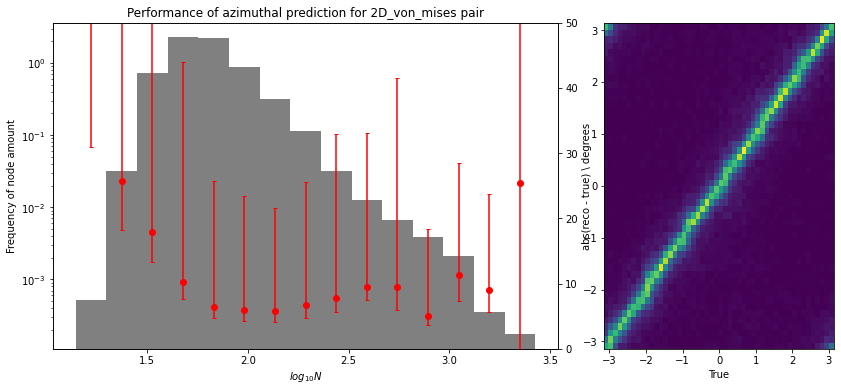

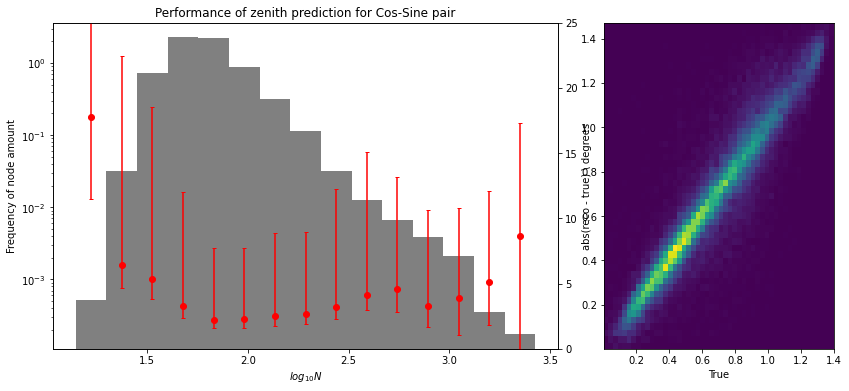

In [8]:
fig1 = plt.figure(figsize = (14, 6))
fig2 = plt.figure(figsize = (14, 6))

gs1  = GridSpec(1, 3, figure = fig1)
gs2  = GridSpec(1, 3, figure = fig2)

ax_azi   = fig1.add_subplot(gs1[:2])
ax_zen   = fig2.add_subplot(gs2[:2])

test_dir = pd.read_pickle(osp.join(test_path, "2DMisesFromUnits.dat"))


reco   = test_dir['reco']
truth  = test_dir['targets']
Ns     = test_dir['Ns']


azi_reco,  zen_reco  = azi_zen_from_units(reco[:, :3])

azi_truth, zen_truth = azi_zen_from_units(truth)


diffs     = 180 / np.pi * np.minimum(abs(azi_truth - azi_reco), 2 * np.pi - abs(azi_truth - azi_reco))
diffs_azi = diffs.copy()
azi_correct = azi_truth - 2 * np.pi * (azi_truth > np.pi)

ax1, ax2 = performance(diffs, Ns, ax_azi);
ax2.set_ylim(0, 50)
ax1.set_title("Performance of azimuthal prediction for 2D_von_mises pair");
ax1.set_ylabel("Frequency of node amount")
ax2.set_ylabel("abs(reco - true) \ degrees")

ax_azi        = fig1.add_subplot(gs1[2])

ax       = reco_true_hist(azi_correct, azi_reco ,ax_azi)


diffs     = 180 / np.pi * np.minimum(abs(zen_truth - zen_reco), 2 * np.pi - abs(zen_truth - zen_reco))
diffs_zen = diffs.copy()

ax1, ax2 = performance(diffs, Ns, ax_zen)
ax1.set_title("Performance of zenith prediction for Cos-Sine pair");
ax1.set_ylabel("Frequency of node amount")
ax2.set_ylabel("abs(reco - true) \ degrees")
ax2.set_ylim(0, 25)

ax_zen        = fig2.add_subplot(gs2[2])
ax            = reco_true_hist(zen_truth, zen_reco, ax_zen)


<ipython-input-9-9c71ac754461>:10: RuntimeWarning: invalid value encountered in true_divide
  sig_azi = np.sqrt(1 - i1(k_azi) / i0(k_azi))
<ipython-input-9-9c71ac754461>:19: RuntimeWarning: invalid value encountered in true_divide
  sig_zen = np.sqrt(1 - i1(k_zen) / i0(k_zen))


(-3.0, 3.0)

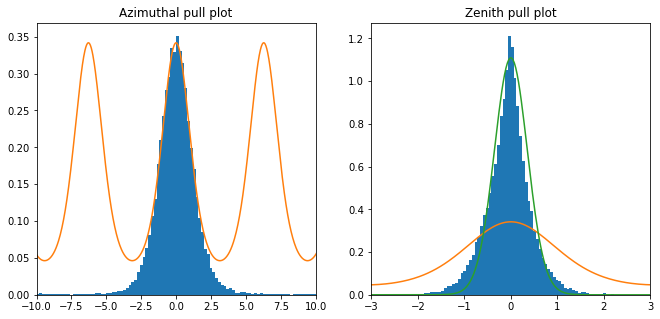

In [9]:
from scipy.special import i0, i1
from scipy.stats import vonmises

xs = np.linspace(-15, 15, 1000)

fig, ax = plt.subplots(ncols = 2, figsize = (11, 5))


k_azi   = reco[:, 3]
sig_azi = np.sqrt(1 - i1(k_azi) / i0(k_azi))

ax[0].set_title("Azimuthal pull plot")
ax[0].hist((azi_reco - azi_truth)/sig_azi, bins = 100, range = (-10, 10), density = True);
ax[0].plot(xs, vonmises.pdf(xs, 1))
ax[0].set_xlim(-10, 10)


k_zen   = reco[:, 4]
sig_zen = np.sqrt(1 - i1(k_zen) / i0(k_zen))

ax[1].set_title("Zenith pull plot")
ax[1].hist((zen_reco - zen_truth)/sig_azi, bins = 100, range = (-3, 3), density = True);
ax[1].plot(xs, vonmises.pdf(xs, 1))
ax[1].plot(xs, vonmises.pdf(xs, 8))
ax[1].set_xlim(-3, 3)


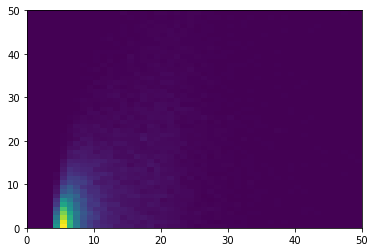

In [10]:
plt.hist2d(sig_azi * 180 / np.pi, diffs_azi, bins = 50, range = ((0, 50), (0, 50)));

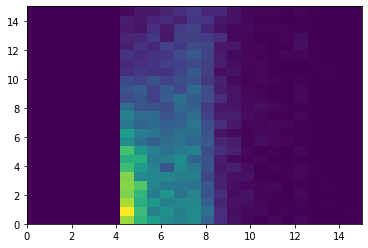

In [11]:
plt.hist2d(sig_zen * 180 / np.pi, diffs_zen, bins = 25, range = ((0, 15), (0, 15)));

# 2 von Mises on circles (from angles) 
predict von mises for zenith and azimuthal. Unit vectors and two kappas equal to the above

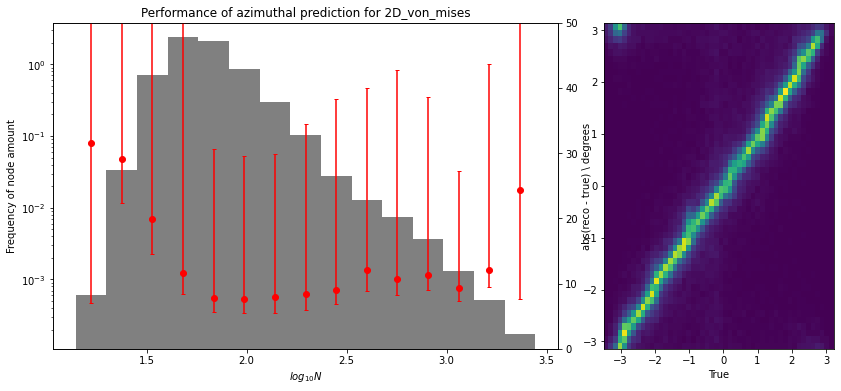

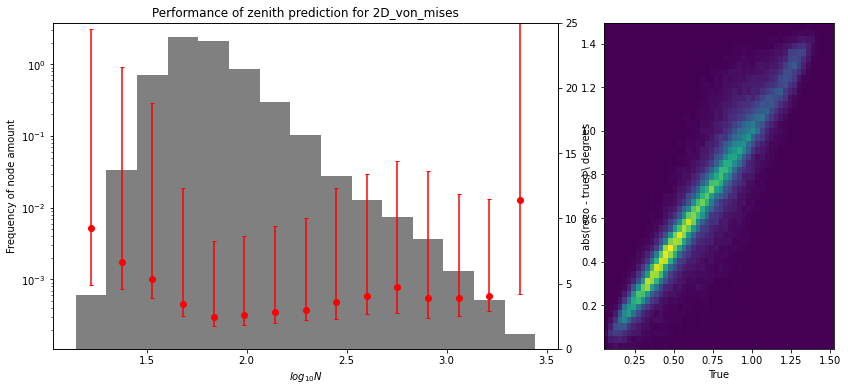

In [12]:
fig1 = plt.figure(figsize = (14, 6))
fig2 = plt.figure(figsize = (14, 6))

gs1  = GridSpec(1, 3, figure = fig1)
gs2  = GridSpec(1, 3, figure = fig2)

ax_azi   = fig1.add_subplot(gs1[:2])
ax_zen   = fig2.add_subplot(gs2[:2])

test_dir = pd.read_pickle(osp.join(test_path, "2DMisesFromAngles.dat"))


reco   = test_dir['reco']
truth  = test_dir['targets']
Ns     = test_dir['Ns']


azi_reco,  zen_reco  = reco[:,0], reco[:, 1]

azi_truth, zen_truth = truth[:,0], truth[:, 1]


diffs     = 180 / np.pi * np.minimum(abs(azi_truth - azi_reco), 2 * np.pi - abs(azi_truth - azi_reco))
diffs_azi = diffs.copy()
# print(diffs)
azi_correct = azi_truth - 2 * np.pi * (azi_truth > np.pi)

ax1, ax2 = performance(diffs, Ns, ax_azi);
ax2.set_ylim(0, 50)
ax1.set_title("Performance of azimuthal prediction for 2D_von_mises");
ax1.set_ylabel("Frequency of node amount")
ax2.set_ylabel("abs(reco - true) \ degrees")

ax_azi        = fig1.add_subplot(gs1[2])

ax       = reco_true_hist(azi_correct, azi_reco ,ax_azi)


diffs     = 180 / np.pi * np.minimum(abs(zen_truth - zen_reco), 2 * np.pi - abs(zen_truth - zen_reco))
diffs_zen = diffs.copy()

ax1, ax2 = performance(diffs, Ns, ax_zen)
ax1.set_title("Performance of zenith prediction for 2D_von_mises");
ax1.set_ylabel("Frequency of node amount")
ax2.set_ylabel("abs(reco - true) \ degrees")
ax2.set_ylim(0, 25)

ax_zen        = fig2.add_subplot(gs2[2])
ax            = reco_true_hist(zen_truth, zen_reco, ax_zen)


<ipython-input-13-08a8a101fe62>:15: RuntimeWarning: invalid value encountered in true_divide
  sig_zen = np.sqrt(1 - i1(k_zen) / i0(k_zen))


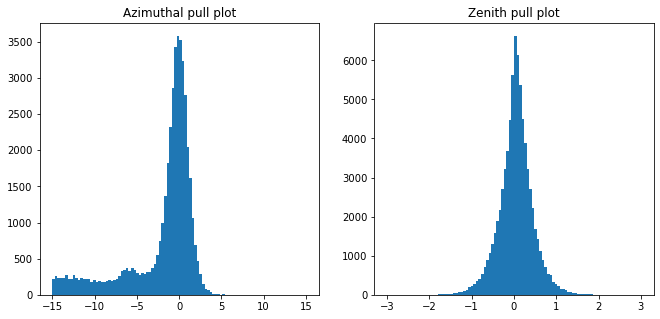

In [13]:
from scipy.special import i0, i1


fig, ax = plt.subplots(ncols = 2, figsize = (11, 5))


k_azi   = reco[:, 2]
sig_azi = np.sqrt(1 - i1(k_azi) / i0(k_azi))

ax[0].set_title("Azimuthal pull plot")
ax[0].hist((azi_reco - azi_truth)/sig_azi, bins = 100, range = (-15, 15));


k_zen   = reco[:, 3]
sig_zen = np.sqrt(1 - i1(k_zen) / i0(k_zen))

ax[1].set_title("Zenith pull plot")
ax[1].hist((zen_reco - zen_truth)/sig_azi, bins = 100, range = (-3, 3));


In [14]:
diffs_azi.shape

(75000,)

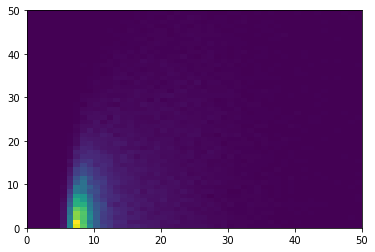

In [15]:
plt.hist2d(sig_azi * 180 / np.pi, diffs_azi, bins = 50, range = ((0, 50), (0, 50)));

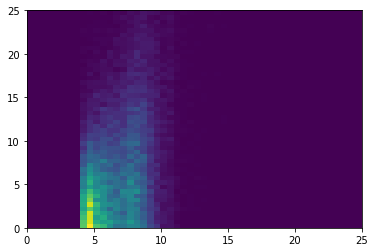

In [16]:
plt.hist2d(sig_zen * 180 / np.pi, diffs_zen, bins = 50, range = ((0, 25), (0, 25 )));

# Gaussian unit vectors

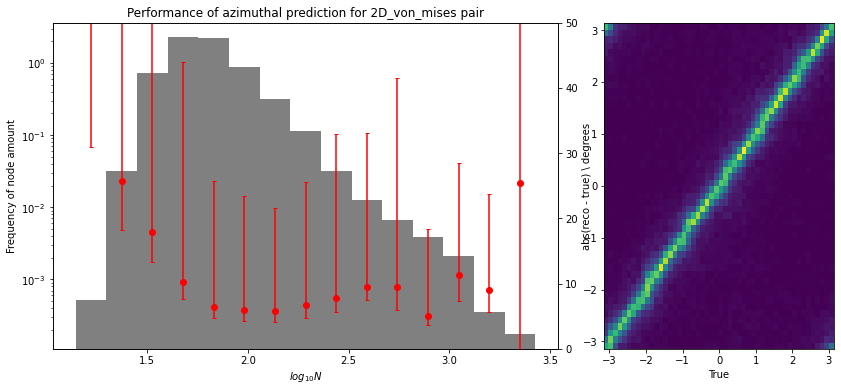

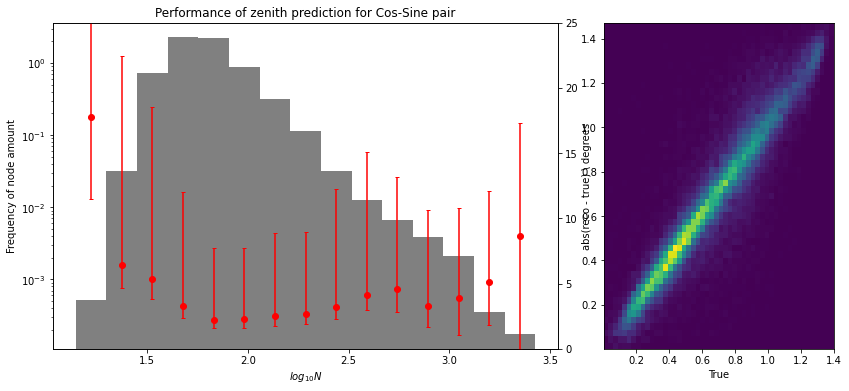

In [17]:
fig1 = plt.figure(figsize = (14, 6))
fig2 = plt.figure(figsize = (14, 6))

gs1  = GridSpec(1, 3, figure = fig1)
gs2  = GridSpec(1, 3, figure = fig2)

ax_azi   = fig1.add_subplot(gs1[:2])
ax_zen   = fig2.add_subplot(gs2[:2])

test_dir = pd.read_pickle(osp.join(test_path, "2DMisesFromUnits.dat"))


reco   = test_dir['reco']
truth  = test_dir['targets']
Ns     = test_dir['Ns']


azi_reco,  zen_reco  = azi_zen_from_units(reco[:, :3])

azi_truth, zen_truth = azi_zen_from_units(truth)


diffs     = 180 / np.pi * np.minimum(abs(azi_truth - azi_reco), 2 * np.pi - abs(azi_truth - azi_reco))
diffs_azi = diffs.copy()
azi_correct = azi_truth - 2 * np.pi * (azi_truth > np.pi)

ax1, ax2 = performance(diffs, Ns, ax_azi);
ax2.set_ylim(0, 50)
ax1.set_title("Performance of azimuthal prediction for 2D_von_mises pair");
ax1.set_ylabel("Frequency of node amount")
ax2.set_ylabel("abs(reco - true) \ degrees")

ax_azi        = fig1.add_subplot(gs1[2])

ax       = reco_true_hist(azi_correct, azi_reco ,ax_azi)


diffs     = 180 / np.pi * np.minimum(abs(zen_truth - zen_reco), 2 * np.pi - abs(zen_truth - zen_reco))
diffs_zen = diffs.copy()

ax1, ax2 = performance(diffs, Ns, ax_zen)
ax2.set_ylim(0, 25)
ax1.set_title("Performance of zenith prediction for Cos-Sine pair");
ax1.set_ylabel("Frequency of node amount")
ax2.set_ylabel("abs(reco - true) \ degrees")


ax_zen        = fig2.add_subplot(gs2[2])
ax            = reco_true_hist(zen_truth, zen_reco, ax_zen)
